# 資料預處理

In [14]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [15]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [16]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [17]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [18]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()

In [21]:
model.add(Dense(units=2000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [22]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [23]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20010     
Total params: 1,590,010
Trainable params: 1,590,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 41s - loss: 0.2499 - accuracy: 0.9251 - val_loss: 0.1279 - val_accuracy: 0.9626
Epoch 2/10
240/240 - 38s - loss: 0.0942 - accuracy: 0.9734 - val_loss: 0.0972 - val_accuracy: 0.9722
Epoch 3/10
240/240 - 40s - loss: 0.0566 - accuracy: 0.9836 - val_loss: 0.0848 - val_accuracy: 0.9739
Epoch 4/10
240/240 - 41s - loss: 0.0362 - accuracy: 0.9897 - val_loss: 0.0784 - val_accuracy: 0.9756
Epoch 5/10
240/240 - 42s - loss: 0.0233 - accuracy: 0.9939 - val_loss: 0.0708 - val_accuracy: 0.9789
Epoch 6/10
240/240 - 40s - loss: 0.0162 - accuracy: 0.9960 - val_loss: 0.0727 - val_accuracy: 0.9785
Epoch 7/10
240/240 - 42s - loss: 0.0113 - accuracy: 0.9975 - val_loss: 0.0733 - val_accuracy: 0.9788
Epoch 8/10
240/240 - 42s - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0727 - val_accuracy: 0.9803
Epoch 9/10
240/240 - 40s - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.0717 - val_accuracy: 0.9798
Epoch 10/10
240/240 - 37s - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.0679 - val_accura

# 以圖形顯示訓練過程

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

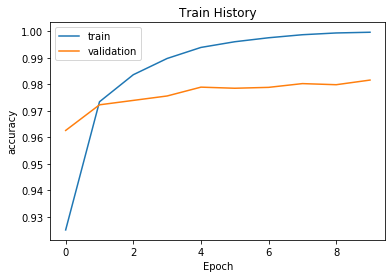

In [27]:
show_train_history(train_history,'accuracy','val_accuracy')

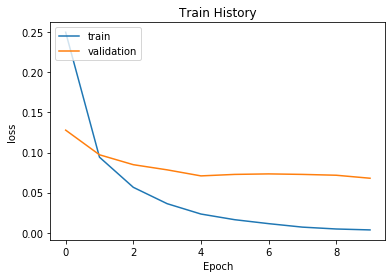

In [28]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [29]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.0632 - accuracy: 0.9833

accuracy= 0.983299970626831


In [ ]:
scores

# 進行預測

In [30]:
prediction=model.predict_classes(x_Test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [32]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

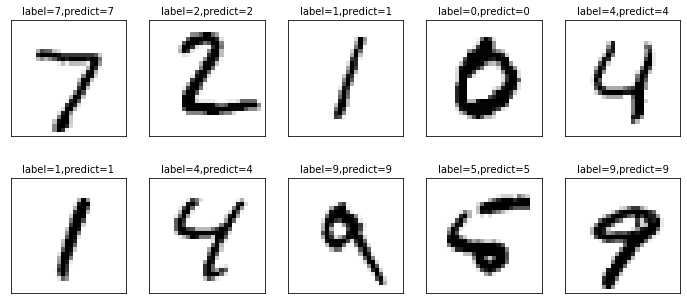

In [33]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [34]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,1,1,1,1,1,0
1,0,1128,3,0,0,0,2,1,1,0
2,4,1,1010,2,1,0,2,5,6,1
3,0,0,1,995,0,3,0,3,4,4
4,2,0,2,1,959,0,3,2,2,11
5,3,0,0,10,1,869,3,0,2,4
6,5,2,1,1,1,4,944,0,0,0
7,1,3,4,1,0,0,0,1010,4,5
8,4,0,1,5,1,1,1,3,954,4


In [35]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [36]:
    k=df.label[i]
    j=df.predict[i]
    for i in range(10):
        if k==i and k!=j:
            print(df[(df.label==i)&(df.predict==j)])
    

NameError: name 'i' is not defined

In [37]:
len(df)

10000

In [38]:
df.label[0]

7

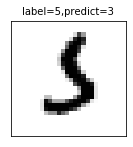

In [39]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

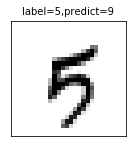

In [40]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)